# Supervised Learning

<a target="_blank" href="https://colab.research.google.com/github/LuWidme/uk259/blob/accf6217cea26299b35784f1225f3e5b427dabb9/demos/SupervisedML.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Linear Regression

In linear regression, the aim is to predict a continuous variable (meaning a numerical value, as opposed to a class) using a set of input variables. To train our model, we need to provide a **labeled dataset**. This labeled dataset contains explanatory variables (the variables used to predict the value) as well as the dependent variables (the true value). The algorithm tries to find a line, that best matches the true values.

### Task 1

Try to fit a linear regression to the data. Show the correlation between the variables `bill_length_mm` and `bill_depth_mm` (`bill_depth_mm` is the dependent variable). You can use the function `sns.lmplot` to achieve this. \

In [ ]:
import seaborn as sns
sns.set_theme()
# %matplotlib widget

# Load the penguins dataset
penguins = sns.load_dataset("penguins")


# visualize the data, show a summary of the variables in question



In [ ]:
# use sns.lmplot to perform a linear regression on the data

Do you see anything interesting? Summarize your results below. Are there other aspects of the data you would like to investigate?

# Supervised Machine Learning, Part 1


### Task 2 K-Nearest Neighbour
Implement the K Nearest Neighbour (KNN) Algorithm for the blob dataset of the previous exercise

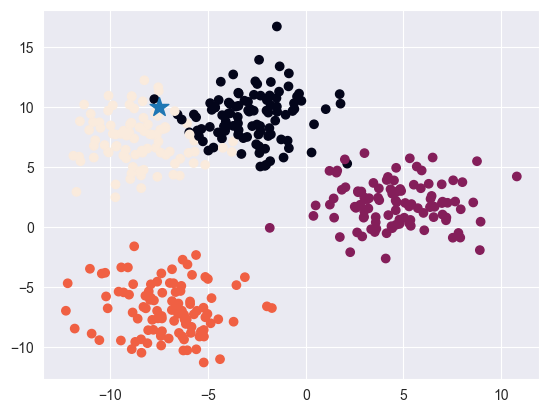

In [121]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

data, labels = make_blobs(
    n_samples=500,
    centers=4,
    cluster_std=2,
    random_state=42
)

experienceData, testData, experienceLabels, testLabels = train_test_split(
    data, labels, test_size=0.20, random_state=42
)

new_point = np.array([-7.5,10])

plt.figure()
plt.scatter(experienceData[:, 0], experienceData[:, 1], c=experienceLabels)
plt.scatter(new_point[0], new_point[1], marker='*', s=200)
plt.show()


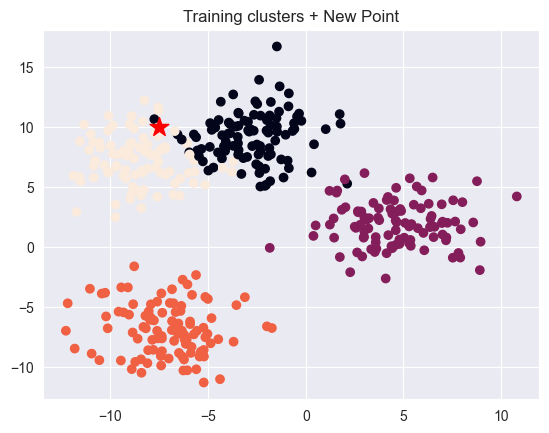

Test‐set accuracy with k=5: 96.00%


In [126]:
from sklearn.metrics import accuracy_score
from collections import Counter


def k_means(newPoint, experienceData,experienceLabels, numberOfNeighbours):
    distance = np.linalg.norm(experienceData - newPoint, axis=1)

    closest_neighbours = np.argsort(distance)[:numberOfNeighbours]

    print("closest neighbour: ", closest_neighbours)

    labels_of_nearest_neighbours = experienceLabels[closest_neighbours]

    print("labels of nearest neighbours: ", labels_of_nearest_neighbours)

    count_of_labels = Counter(labels_of_nearest_neighbours)

    predicted_class = count_of_labels.most_common(1)[0][0]

    return predicted_class

k_means([-7.5,10], experienceData,experienceLabels,5)


## Support Vector Machines

Support Vector Machines (SVM) are a common tool for classification (predicting a categorical label/dependent variable for each datapoint). It tries to predict a line (or plane in higher dimensions) that best separates two or more classes from each other. This line is defined mathematically by its "support vector", hence the name.
[Documentation](https://scikit-learn.org/stable/modules/svm.html)

In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

import pandas as pd
penguins2=penguins.copy()[penguins["species"]!= "Chinstrap"]
X = penguins2.dropna()[["bill_length_mm", "bill_depth_mm"]]
y = penguins2.dropna()["species"]


# scale the data to make variables comparable
scaler = StandardScaler()
X.iloc[:] = scaler.fit_transform(X)

#encode strings as integers
y=y.astype("category").cat.codes


print(X[:5])
print(y[:5])

   bill_length_mm  bill_depth_mm
0       -0.701364       0.925911
1       -0.624514       0.277848
2       -0.470814       0.576954
4       -1.162463       1.225017
5       -0.662939       1.873079
0    0
1    0
2    0
4    0
5    0
dtype: int8


In [ ]:
%%sql


We go a step further and split the data into training and test datasets. This allows us to better asses the performance of our classifier. We use the training data to train our classifier (meaning we calculate the best line to separate the classes in the training dataset) and use the test data to test the performance. \

Think about why this split could make sense and what a potential drawback of doing this could be.

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

Next we train our classifier using the training data and their true labels:

In [ ]:
# implement the training step using the svm.SVC() function

next we can use the trained model to predict the labels on our training data

In [ ]:
# implement the prediction step

Once you have trained your model you can evaluate its performance on the test data using the code below:

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


NameError: name 'y_pred' is not defined

## Bonus Task:

Visualize the **training** and **test** data separately as a scatterplot and include your classifier as a line in the plot.